# Part I: Data Preparation and Analysis

## Add all necessary imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


In [4]:
rssi_dataset = pd.read_csv('./dataset_Seminar3/rssi_data.csv')
labels_dataset = pd.read_csv('./dataset_Seminar3/labels_data.csv')

# Check the first few rows of the datasets
print(rssi_dataset.head())
print(labels_dataset.head())

# Check the shape of the datasets
print(rssi_dataset.shape)
print(labels_dataset.shape)

# Check the data types
print(rssi_dataset.dtypes)
print(labels_dataset.dtypes)

   -21.949  -99.659  -42.257
0  -34.049  -95.964  -47.779
1  -18.861 -100.000  -34.175
2  -53.497  -77.368  -67.360
3  -54.986  -73.012  -69.780
4  -52.012  -84.214  -73.244
   5
0  4
1  5
2  2
3  2
4  2
(1499, 3)
(1499, 1)
-21.949    float64
-99.659    float64
-42.257    float64
dtype: object
5    int64
dtype: object


## 2D Plot of the RSSI values perceived by each pair of APs

/var/folders/l0/1yhl7r590v37jd1wr6xrg3hc0000gp/T/ipykernel_91566/1108627740.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


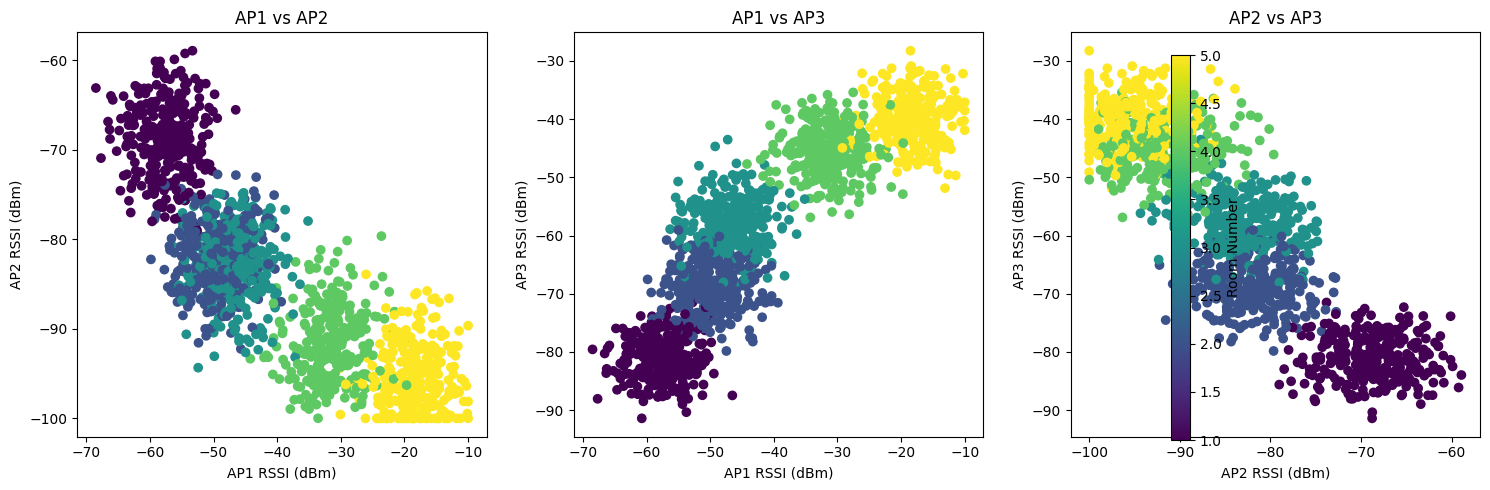

In [5]:
# Create a figure with subplots for each pair of APs
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot AP1 vs AP2
axes[0].scatter(rssi_dataset.iloc[:, 0], rssi_dataset.iloc[:, 1], c=labels_dataset.iloc[:, 0], cmap='viridis')
axes[0].set_xlabel('AP1 RSSI (dBm)')
axes[0].set_ylabel('AP2 RSSI (dBm)')
axes[0].set_title('AP1 vs AP2')

# Plot AP1 vs AP3
axes[1].scatter(rssi_dataset.iloc[:, 0], rssi_dataset.iloc[:, 2], c=labels_dataset.iloc[:, 0], cmap='viridis')
axes[1].set_xlabel('AP1 RSSI (dBm)')
axes[1].set_ylabel('AP3 RSSI (dBm)')
axes[1].set_title('AP1 vs AP3')

# Plot AP2 vs AP3
axes[2].scatter(rssi_dataset.iloc[:, 1], rssi_dataset.iloc[:, 2], c=labels_dataset.iloc[:, 0], cmap='viridis')
axes[2].set_xlabel('AP2 RSSI (dBm)')
axes[2].set_ylabel('AP3 RSSI (dBm)')
axes[2].set_title('AP2 vs AP3')

# Add colorbar
plt.colorbar(axes[0].collections[0], ax=axes, label='Room Number')

# Adjust layout and display
plt.tight_layout()
plt.show()


## 3D Plot showing the RSSI values perceived by each of the 3 APs

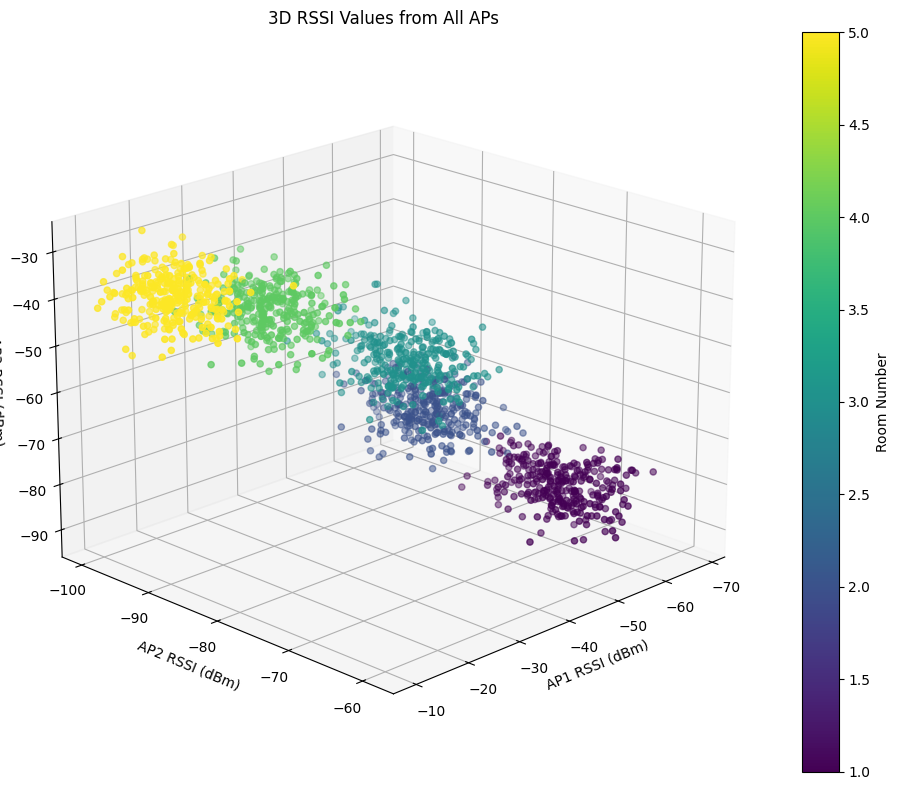

In [6]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(rssi_dataset.iloc[:, 0], 
                    rssi_dataset.iloc[:, 1], 
                    rssi_dataset.iloc[:, 2],
                    c=labels_dataset.iloc[:, 0],
                    cmap='viridis')

# Set labels and title
ax.set_xlabel('AP1 RSSI (dBm)')
ax.set_ylabel('AP2 RSSI (dBm)')
ax.set_zlabel('AP3 RSSI (dBm)')
ax.set_title('3D RSSI Values from All APs')

# Add colorbar
plt.colorbar(scatter, label='Room Number')

# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()


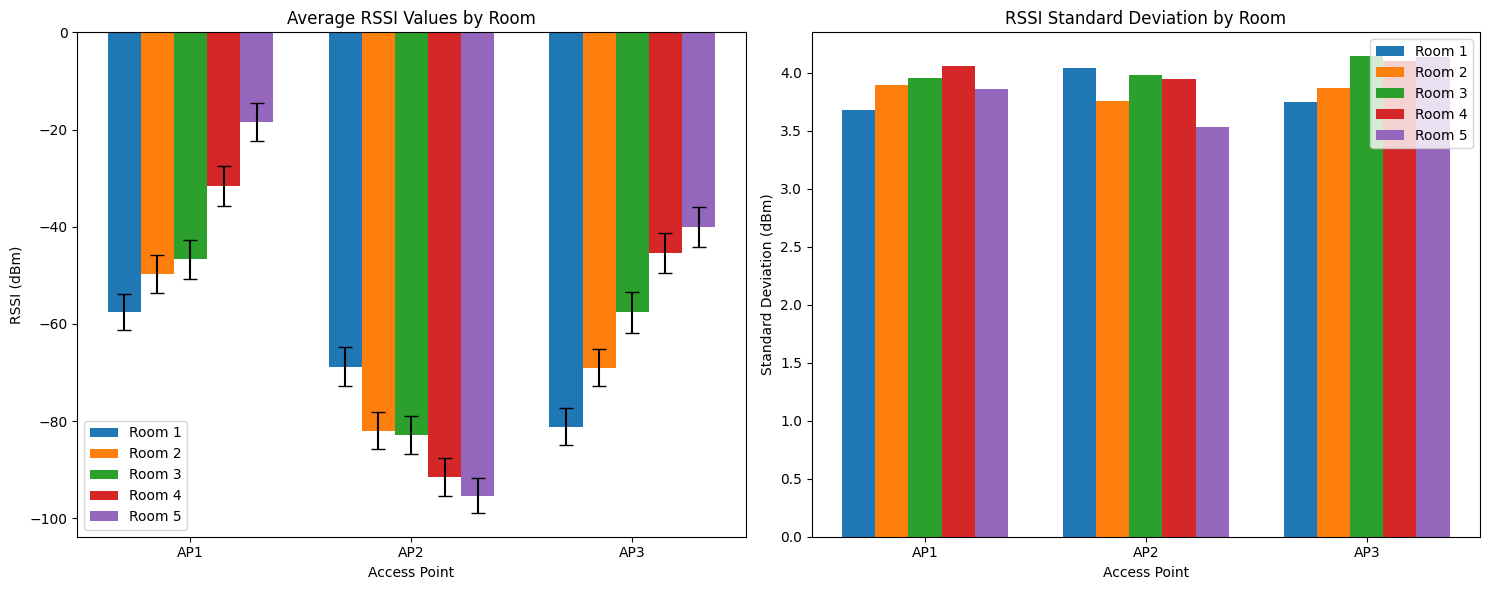


Detailed Statistics by Room:
--------------------------------------------------

Room 1:
Mean RSSI values:
AP1: -57.55 dBm
AP2: -68.77 dBm
AP3: -81.16 dBm
Standard deviations:
AP1: 3.68 dBm
AP2: 4.04 dBm
AP3: 3.75 dBm

Room 2:
Mean RSSI values:
AP1: -49.81 dBm
AP2: -81.98 dBm
AP3: -68.98 dBm
Standard deviations:
AP1: 3.89 dBm
AP2: 3.76 dBm
AP3: 3.87 dBm

Room 3:
Mean RSSI values:
AP1: -46.74 dBm
AP2: -82.88 dBm
AP3: -57.63 dBm
Standard deviations:
AP1: 3.95 dBm
AP2: 3.98 dBm
AP3: 4.14 dBm

Room 4:
Mean RSSI values:
AP1: -31.58 dBm
AP2: -91.49 dBm
AP3: -45.48 dBm
Standard deviations:
AP1: 4.06 dBm
AP2: 3.94 dBm
AP3: 4.10 dBm

Room 5:
Mean RSSI values:
AP1: -18.47 dBm
AP2: -95.33 dBm
AP3: -40.07 dBm
Standard deviations:
AP1: 3.86 dBm
AP2: 3.53 dBm
AP3: 4.13 dBm


In [7]:
# Calculate statistics for each room
room_stats = []
for room in range(1, 6):
    room_data = rssi_dataset[labels_dataset.iloc[:, 0] == room]
    means = room_data.mean()
    stds = room_data.std()
    room_stats.append({
        'room': room,
        'means': means,
        'stds': stds
    })

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
x = np.arange(3)
width = 0.15
for i, stats in enumerate(room_stats):
    ax1.bar(x + i*width, stats['means'], width, 
            label=f'Room {stats["room"]}',
            yerr=stats['stds'],
            capsize=5)

ax1.set_xlabel('Access Point')
ax1.set_ylabel('RSSI (dBm)')
ax1.set_title('Average RSSI Values by Room')
ax1.set_xticks(x + width*2)
ax1.set_xticklabels(['AP1', 'AP2', 'AP3'])
ax1.legend()

# Plot standard deviations
for i, stats in enumerate(room_stats):
    ax2.bar(x + i*width, stats['stds'], width, 
            label=f'Room {stats["room"]}')

ax2.set_xlabel('Access Point')
ax2.set_ylabel('Standard Deviation (dBm)')
ax2.set_title('RSSI Standard Deviation by Room')
ax2.set_xticks(x + width*2)
ax2.set_xticklabels(['AP1', 'AP2', 'AP3'])
ax2.legend()

plt.tight_layout()
plt.show()

# Print numerical statistics
print("\nDetailed Statistics by Room:")
print("-" * 50)
for stats in room_stats:
    print(f"\nRoom {stats['room']}:")
    print("Mean RSSI values:")
    for ap, mean in enumerate(stats['means'], 1):
        print(f"AP{ap}: {mean:.2f} dBm")
    print("Standard deviations:")
    for ap, std in enumerate(stats['stds'], 1):
        print(f"AP{ap}: {std:.2f} dBm")


# Part II: k-means implementation

In [ ]:
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)

def kmeans(X, k=3, max_iters=100):
    # Randomly initialize centroids
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
            
        centroids = new_centroids
    
    return labels, centroids

# Run k-means
labels, centroids = kmeans(X)

# Visualize results (first 2 dimensions)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print final centroids
print("\nFinal Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: {centroid}")


KeyError: "None of [Index([1138, 340, 747], dtype='int64')] are in the [columns]"

Converged after 31 iterations


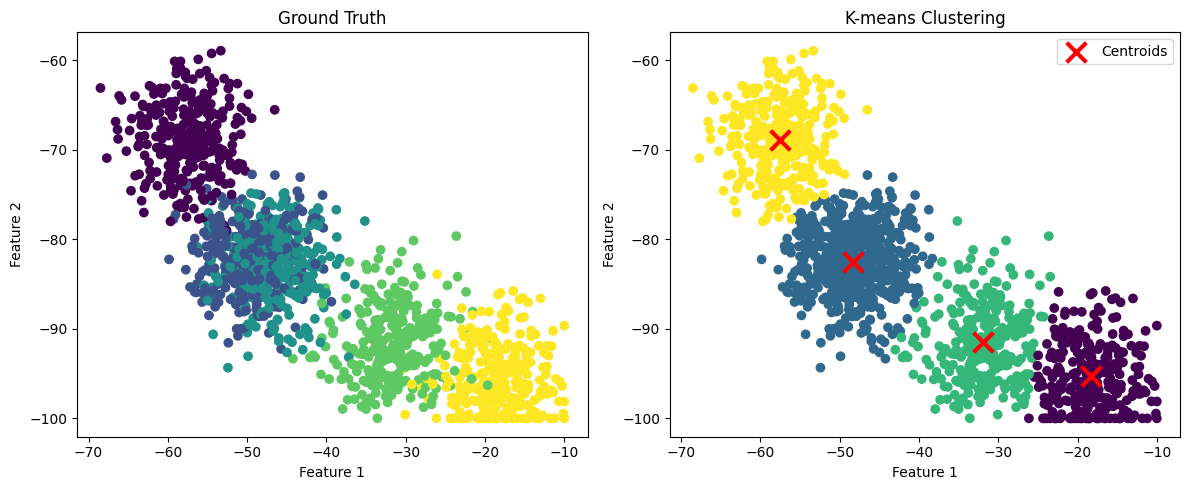


Adjusted Rand Index: 0.724


In [13]:
# Load and preprocess WiFi dataset
X_wifi = rssi_dataset.iloc[:, :-1].values  # Features
y_wifi = labels_dataset.iloc[:, -1].values   # Ground truth labels

def kmeans_with_convergence(X, k=4, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    prev_labels = None
    
    for iteration in range(max_iters):
        # Calculate distances and assign labels
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Check for empty clusters and reinitialize if needed
        for i in range(k):
            if np.sum(labels == i) == 0:
                centroids[i] = X[np.random.choice(n_samples, 1)]
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check convergence conditions
        if prev_labels is not None and np.array_equal(labels, prev_labels):
            print(f"Converged after {iteration + 1} iterations")
            break
            
        prev_labels = labels.copy()
        centroids = new_centroids
    
    return labels, centroids

# Run k-means on WiFi dataset
wifi_labels, wifi_centroids = kmeans_with_convergence(X_wifi)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot ground truth
plt.subplot(1, 2, 1)
plt.scatter(X_wifi[:, 0], X_wifi[:, 1], c=y_wifi, cmap='viridis')
plt.title('Ground Truth')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot k-means results
plt.subplot(1, 2, 2)
plt.scatter(X_wifi[:, 0], X_wifi[:, 1], c=wifi_labels, cmap='viridis')
plt.scatter(wifi_centroids[:, 0], wifi_centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate accuracy
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_wifi, wifi_labels)
print(f"\nAdjusted Rand Index: {ari_score:.3f}")
